In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import csv
font = {'size'   : 16}

matplotlib.rc('font', **font)

goal_colors = ['#0c0787', '#7e02a8',  
          '#cb4778', '#f89441', '#f0f921'] 
def generate_sips_mean_array(filename):
    mean_array = np.array([0,0,0,0,0])
    with open("sips_results_new/" + filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',', quotechar='\'')
        for row in csvreader:
            if len(row) > 2:
                time = row[0]
                mean = []
                for i in range(1,6):
                    prob = row[i]
                    # parse string into float
                    prob = prob.replace("\"", "").replace("[", "").replace("]", "")
                    prob = float(prob)
                    mean.append(prob)
                mean_array = np.vstack([mean_array, np.array(mean)])
        return mean_array[1:]


In [13]:
def format_legend(exp): 
    legend = goal_space_dict[exp].copy() 
    true_goal = legend.index(true_goal_dict[exp])
    legend[true_goal] = legend[true_goal] + " (true goal)"
    return legend

In [14]:
def plot_probs(exp):
    c,p = exp.split("_")
    filename = "scenario-" + str(c) + "-" + str(p) + ".csv"
    sips_mean_array= generate_sips_mean_array(filename)

    fig, axs = plt.subplots(2, 1, figsize=[25,8])
#     huma_data = predictions_dict_cleaned[exp]
#     mean_array = np.array([0,0,0,0,0])
#     std_array = np.array([0,0,0,0,0])
#     for step, data in huma_data.items(): 
#         goals_probs = pd.DataFrame.from_dict(data, orient='columns', dtype=None, columns=None)
#         goals_probs = goals_probs[['goal_probs_0', 'goal_probs_1', 'goal_probs_2', 'goal_probs_3', 'goal_probs_4']].values
#         mean = np.mean(goals_probs, axis=0)
#         std = np.std(goals_probs, axis=0)
#         mean_array = np.vstack([mean_array, mean])
#         std_array = np.vstack([std_array, std])
#     mean_array = mean_array[1:]
#     std_array = std_array[1:]
#     for i in range(mean_array.shape[1]): 
#         axs[0].plot(range(1, mean_array.shape[0]*2+1,2), mean_array[:,i], color=goal_colors[i], linewidth=4)
#         axs[0].scatter(range(1, mean_array.shape[0]*2+1,2), mean_array[:,i], color=goal_colors[i])
#         axs[0].fill_between(range(1, mean_array.shape[0]*2+1,2), mean_array[:,i] - std_array[:,i], mean_array[:,i] + std_array[:,i], color=goal_colors[i], alpha=0.2)
#     title = exp.split("_")
#     axs[0].set_title("{0} Scenario {1} - human results".format(categories[int(title[0])], title[1]))
#     axs[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2)
#     axs[0].set_ylim([-0.01,1.01])
#     axs[0].set_xlim([1,sips_mean_array.shape[0]])
#     axs[0].legend(format_legend(exp), loc = 'upper left', fancybox=True, framealpha=0, fontsize=14)
    for i in range(sips_mean_array.shape[1]): 
        axs[1].plot(range(1, sips_mean_array.shape[0]+1), sips_mean_array[:,i], color=goal_colors[i], linewidth=4)
        axs[1].scatter(range(1, sips_mean_array.shape[0]+1), sips_mean_array[:,i], color=goal_colors[i])
    title = exp.split("_")
    axs[1].set_title("{0} Scenario {1} - SIPS results".format(categories[int(title[0])], title[1]))
    axs[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2)
    axs[1].set_ylim([-0.01,1.01])
    axs[1].set_xlim([1,sips_mean_array.shape[0]])
    fig.savefig('plots/sips/prob_traj_{}.png'.format(exp), dpi=400)
    for ax in axs.flat:
        ax.label_outer()

NameError: name 'categories' is not defined

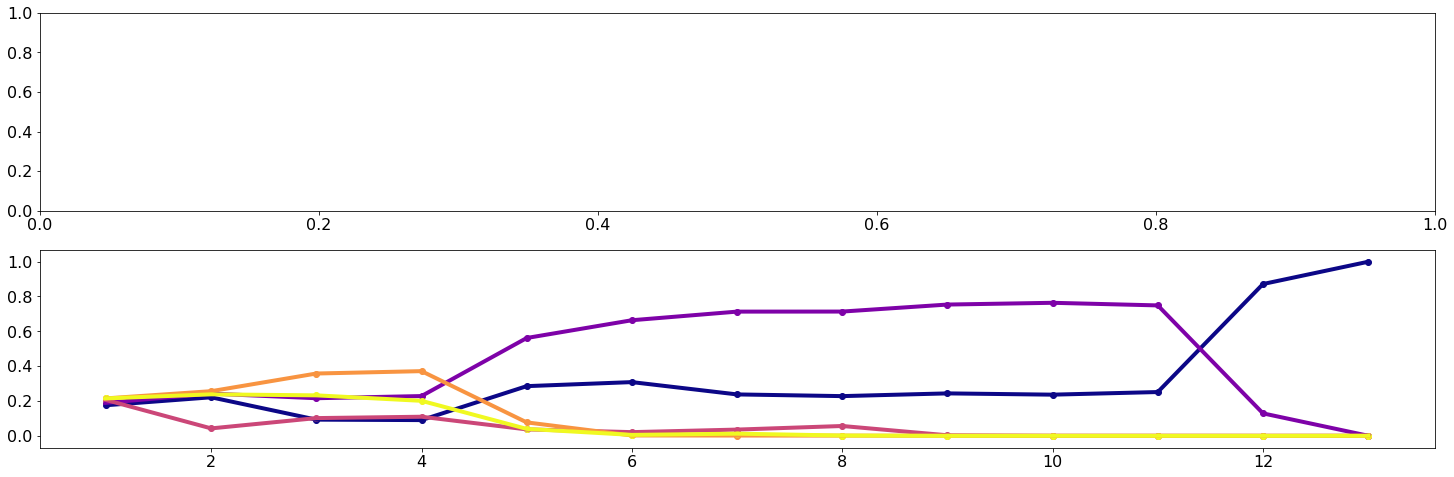

In [16]:
# plot_exp = ['1_1','1_2', '1_3', '1_4']
# plot_exp = ['2_1','2_2', '2_3', '2_4']

plot_exp = ['3_1','3_2', '3_3', '3_4']
# plot_exp = ['4_1','4_2', '4_3', '4_4']
# plot_exp = ['0_1','0_2', '0_3', '0_4']
for exp in plot_exp:
    plot_probs(exp)